In [11]:
import os
import configparser

import requests
from   PIL import Image
from io import BytesIO
#import tiktoken
import numpy as np



config = configparser.ConfigParser()
config.read(os.path.join(os.getcwd(), os.pardir, 'config.ini'))
api_key  = config.get('keys', 'api_key')
cse_id   = config.get('keys', 'cse_id')
data_dir = config.get('directories', 'shakespeare')

save_dir = os.path.join(os.getcwd(), os.pardir, 'out')


In [4]:
url = 'https://www.googleapis.com/customsearch/v1'
params = {'q'   : 'duck',
          'key' : api_key,
          'cx'  :  cse_id,
          'searchType': 'image',
          'num' : 1
    }

response = requests.get(url, params=params)
data = response.json()

In [6]:
data['items']

[{'kind': 'customsearch#result',
  'title': '10 Facts About Ducks - FOUR PAWS International - Animal Welfare ...',
  'htmlTitle': '10 Facts About <b>Ducks</b> - FOUR PAWS International - Animal Welfare ...',
  'link': 'https://media.4-paws.org/b/8/d/5/b8d5441fec6b84e9c3cba899549b84bb0f193fff/VIER%20PFOTEN_2019-07-18_013-2890x2000.jpg',
  'displayLink': 'www.four-paws.org',
  'snippet': '10 Facts About Ducks - FOUR PAWS International - Animal Welfare ...',
  'htmlSnippet': '10 Facts About <b>Ducks</b> - FOUR PAWS International - Animal Welfare ...',
  'mime': 'image/jpeg',
  'fileFormat': 'image/jpeg',
  'image': {'contextLink': 'https://www.four-paws.org/campaigns-topics/topics/farm-animals/10-facts-about-ducks',
   'height': 2000,
   'width': 2890,
   'byteSize': 555340,
   'thumbnailLink': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEYDl0qNxvmRjlpblAXJqrs5aahQ0ULl8xTF0wRcBsFnKMqaPhyMeV_88&s',
   'thumbnailHeight': 104,
   'thumbnailWidth': 150}}]

In [12]:
if 'items' not in data: 
    print("No images found or error in API call.")
else:   
    for i, item in enumerate(data['items']):
        image_url = item['link']
        print(f"Downloading: {image_url}")

        try:
            img_data = requests.get(image_url).content
            img = Image.open(BytesIO(img_data))
            file_path = os.path.join(save_dir, f"{'duck'.replace(' ', '_')}_{i+1}.jpg")
            img.save(file_path)
            print(f"Saved to: {file_path}")
        except Exception as e:
            print(f"Failed to download {image_url}: {e}")


Downloading: https://media.4-paws.org/b/8/d/5/b8d5441fec6b84e9c3cba899549b84bb0f193fff/VIER%20PFOTEN_2019-07-18_013-2890x2000.jpg
Saved to: C:\Users\ams90\PycharmProjects\MyFirstLLM\ad-hoc\..\out\duck_1.jpg


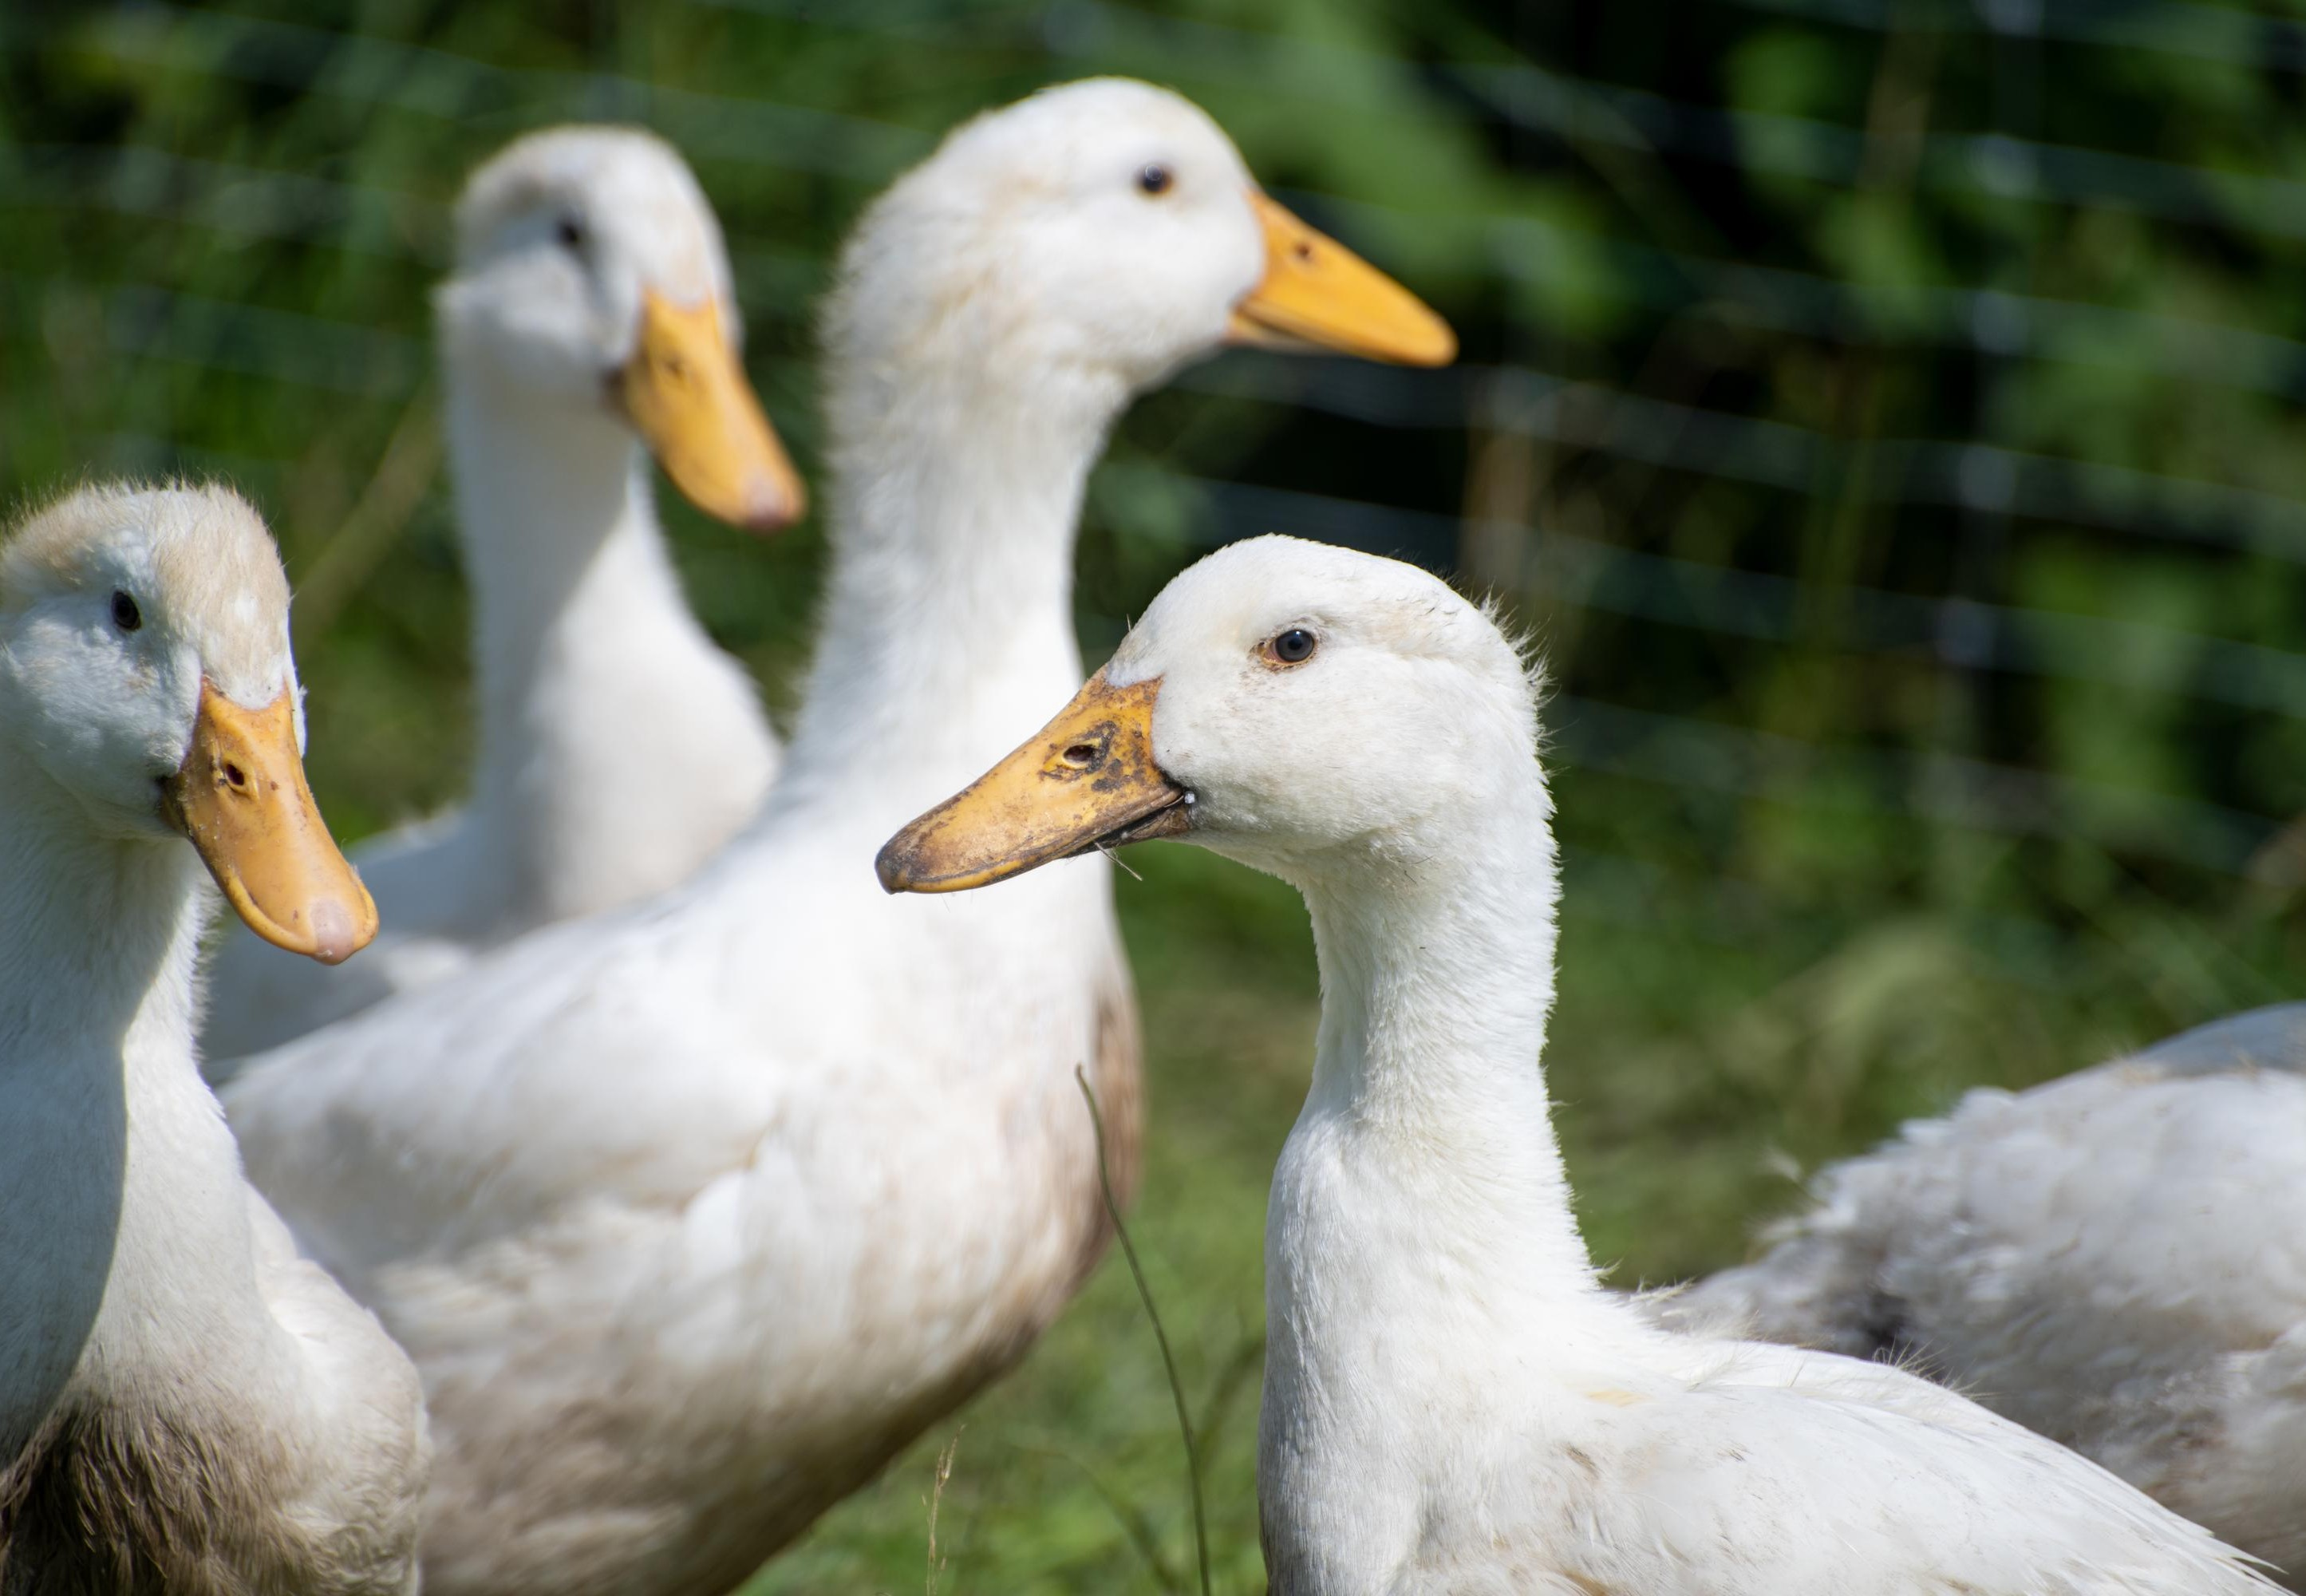

In [13]:
img